# Практическое задание по ОММ

### Автор: Талавринова Софья

## Вариант 6

## Постановка задачи:
Используя схему бегущего счёта и итерационные методы решить задачу
    \begin{equation*}
        \begin{cases}
            \frac{\partial u}{\partial t}-(2\cdot u+t)\cdot\frac{\partial u}{\partial     x}=0\qquad -1<x<0),
            \\
            u(x;0)=1-x,
            \\
            u(0;t)=\frac{2-t^2}{4\cdot t+2}.
        \end{cases}
    \end{equation*}

*Построение характеристик*

В точках пересечения проекций его характеристик, решение будет разрывным. Посмотрим как будут вести себя проекции характеристик в заданных областях. Уравнение характеристик будет иметь вид:


$$\frac{dt}{1}=-\frac{dx}{2\cdot u+t}=\frac{du}{0}$$
А значит

\begin{equation*}
\begin{cases}
u=u(x_0;t_0))=const
\\
x-x_0=2\cdot u\cdot (t-t_0)+\frac{t^2-t_0^2}{2}
\end{cases}
\end{equation*}
Воспользуемся начальным и граничным условиями для получения двух семейств кривых:

$$ 1) \qquad t_0=0 \qquad x=x_0+2\cdot (1-x_0)\cdot t+\frac{t^2-t_0^2}{2} $$

$$ 2) \qquad x_0=0 \qquad x=2\cdot \frac{(2-t_0^2)}{(4\cdot t_0+2)}\cdot (t-t_0)+\frac{t^2-t_0^2}{2}$$

Импортируем необходимые библиотеки

<IPython.core.display.Javascript object>


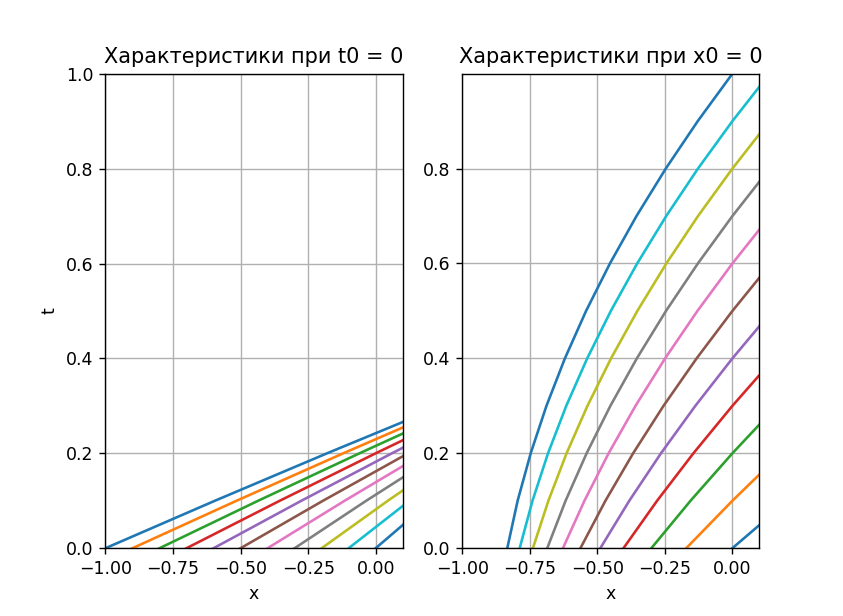

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def ch1(t):
    return [x0+2*(1-x0)*t+(t**2)/2 for x0 in np.arange(-1, 0.1, .1)]

def ch2(t):
    return [2*(2-t0**2)*(t-t0)/(2*(2*t0+1))+(t**2-t0**2)/2 for t0 in np.arange(0, 1.1, .1)]
t_list = np.arange(-1, 1.1, .1)


ch1_list = [ch1(t) for t in t_list]
ch2_list = [ch2(t) for t in t_list]
%matplotlib notebook

plt.subplot(1, 2, 1)
plt.ylim(0,1)
plt.xlim(-1,0.1)
plt.plot(ch1_list, t_list) 
plt.title('Характеристики при t0 = 0')
plt.ylabel('t')
plt.xlabel('x')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.ylim(0,1)
plt.xlim(-1,0.1)
plt.plot(ch2_list, t_list)
plt.title('Характеристики при x0 = 0')
plt.xlabel('x')
plt.grid(True)
plt.show()

Как видно на заданном отрезке [-1;0] характеристики не пересекаются.Также видно, что характеристики имеют параболическую зависимость x от t.

## Метод решения

 Введём в области  $  Ω = {(x,t):−1≤x≤0,0<t≤2} $ сетку с шагом h по x и шагом $ τ $ по t:
 \begin{equation*}
        \begin{cases} 
            x_n=n⋅h,h=\frac{−1}{N−1},n=\overline{0,N−1} 
            \\
            t_m=m⋅τ,τ=\frac{1}{M−1} ,m=\overline{0,M−1}
        \end{cases}
 \end{equation*}
 

На $ ω_{hx, ht} $ будем рассматривать сеточную функцию $ y_{n}^m=u(x_n,t_m) $

## Шаблон

Перепишем исходное уравнение, приведя его к дивергентному виду:
$$ \frac{\partial u}{\partial t}-\frac{\partial (u+t\cdot u)}{\partial t}=0 $$
Для рассматриваемой задачи будем использовать четырехточечный шаблон. Он безусловно устойчив и аппроксимирует задачу как $ O(h_x^2+h_t^2) $.

Таким образом, разностная схема задачи имеет вид: 
$$ \frac{y^{m+1}_n - y^m_{n} + y^{m+1}_{n+1} - y^m_{n+1}}{2h_t} + \frac{(F^{m+1}_{n}) - (F^{m}_{n}) + (F^{m+1}_{n+1}) - (F^{m}_{n+1})}{2 \cdot 2h_x}=0 $$
Где $$ F_n^m = F(y_n^m) = (y_n^m+t*y_n^m)$$
При начальных условиях:
 \begin{equation*}
        \begin{cases}
            y_n^0(x;0)=1-nh_x,
            \\
            y_0^m(0;t)=\frac{2-(mh_t)^2}{4\cdot nh_t+2}.
        \end{cases}
    \end{equation*}

## Cхема бегущего счета
Данную задачу будем решать при помощи схемы бегущего счета. Значение сеточной функции  $ y_{m+1}^{n+1} $ неизвестно, но нам известны все значения, соответствующие начальному$  y_0^n $и граничному $ y_m^0  $ условиям. Таким образом, зная значения в трех соседних точках: $ y_0^0,y_0^1,y_1^0 $, мы можем численно найти значение в четвертой точке $ y_1^1 $. Зная это значение, мы можем найти по трем известным точкам либо $ y_2^1 $, либо $ y_1^2 $. И так далее, заполняя найденными значениями сетку.
Также начальное и граничное условия:
    \begin{equation*}
        \begin{cases}
            y_n^0(x;0)=1-nh_x,
            \\
            y_0^m(0;t)=\frac{2-(mh_t)^2}{4\cdot nh_t+2}.
        \end{cases}
    \end{equation*}
    Это неявное уравнение относительно  $ y^{m+1}_{n+1} $. Будем решать его итерационным методом Ньютона.
$${y^{m+1}_{n+1}}^{(s+1)} = {y^{m+1}_{n+1}}^{(s)} - \frac{ f({y^{m+1}_{n+1}}^{(s)}) }  { f'({y^{m+1}_{n+1}}^{(s)})} $$
До достижения заданной точности ϵ:
$$ | {y^{m+1}_{n+1}}^{(s+1)} - {y^{m+1}_{n+1}}^{(s)} | \leq \epsilon $$

## Исполняемый код

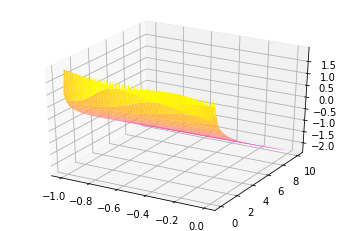

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N, M = 100, 1000  # количество x, t
X, T = -1, 10

y = np.zeros((N, M), dtype=float)
x, t = np.linspace(-1,0, N), np.linspace(0, T, M) #заполняем массив числами

h = float(X)/(N-1)
τ = float(T)/(M-1)

eps = 0.01  # невязка

y[:, 0] = 1-x
y[0, :] = (2-t**2)/(4*t+2)

def p(u,t):
    return -1*(u+t*u)

def Dp(u,t):
    return -1*(2*u+t)

def f(x, a, b,t):
    return (x-a)/τ + (p(x,t)-p(b,t))/h

def Df(x,t):
    return 1/τ + Dp(x,t)/h

def solve(a, b,t):
    result = b  # начальное приближение
    d = eps+1  # чтобы цикл запустился
    while (d > eps):
        y = result
        result = y-f(y, a, b,t)/Df(y,t)
        d = abs(result-y)
    return result

for i in range(1, N):
    for j in range(1, M):
        y[i, j] = solve(y[i, j-1], y[i-1, j],τ*j)
fig = plt.figure()
ax = fig.gca(projection='3d')
t, x = np.meshgrid(t, x)

surf = ax.plot_surface(x, t, y, cmap='spring')